In [1]:
import pandas as pd

In [2]:
from iexfinance import Stock
tsla = Stock('AAPL')
tsla.get_open()
tsla.get_price()

176.69

In [8]:
from iexfinance import get_historical_data
from datetime import datetime

start = datetime(2016, 1, 1)  #month, day
end = datetime(2016, 6, 30)

df = get_historical_data("AAPL", start=start, end=end, output_format='pandas')['close']
df.head()

date
2016-01-04    99.9257
2016-01-05    97.4216
2016-01-06    95.5151
2016-01-07    91.4839
2016-01-08    91.9677
Name: close, dtype: float64

/usr/local/lib/python3.5/dist-packages/pandas/core/indexes/base.py:2084: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)


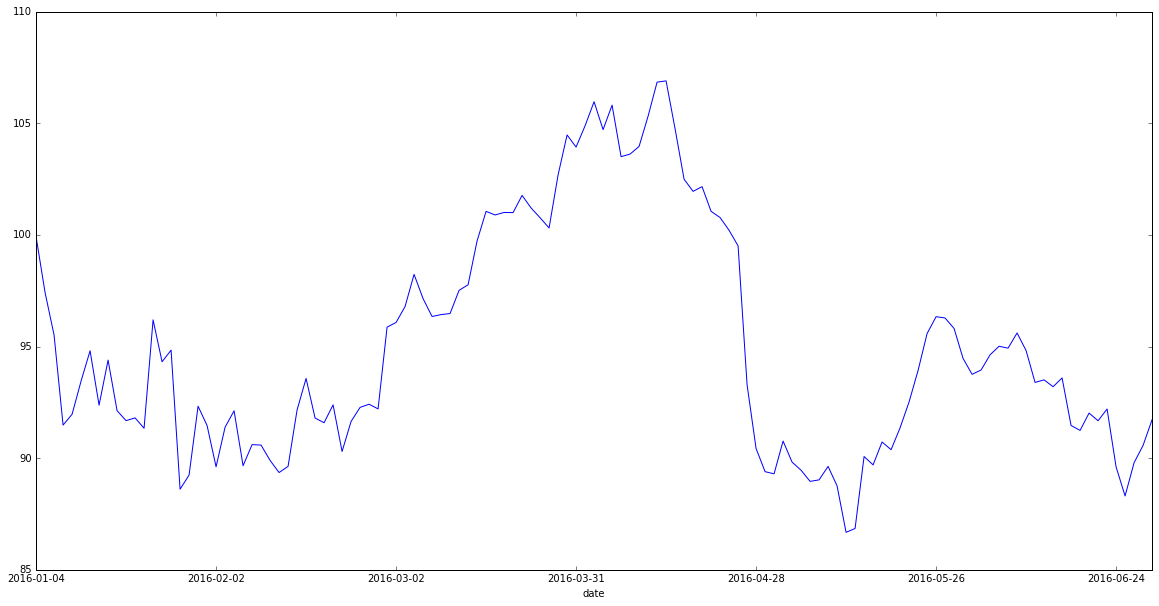

None


In [9]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
df.plot()
print(plt.show())

In [10]:
# https://www.alphavantage.co/
alpha_api = 'DX33NWHEF3UT1B3S'


In [24]:
import urllib.request
import json
import os

#https://github.com/aknakshay/stockmarketanalysis/blob/master/PullData/NASDAQ.py
#https://www.cloudsigma.com/nasdaq-per-minute-data-using-python/

def import_web(ticker):
    """
    :param identifier: List, Takes the company name
    :return:displays companies records per minute
    """
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_&symbol='+ticker +'&interval=1min&apikey=' + alpha_api + '&outputsize=full&datatype=json'
    fp = urllib.request.urlopen(url)
    mybytes = fp.read()
    mystr = mybytes.decode("utf8")
    fp.close()
    return mystr


def get_value(ticker):
    js = import_web(ticker)
    parsed_data = json.loads(js) # loads the json and converts the json string into dictionary
    ps = parsed_data['Time Series (1min)']
    partitionSave(ps,ticker)

            
def partitionSave(ps,ticker):
    date = {}
    for i in ps:
        date[i[:10]] = "date"
    for d in date.keys():
        tmp = {}
        for i in ps:
            if(i[:10] == d):
                tmp[i] = ps[i]
        if(os.path.isdir(d) == False):
            os.mkdir(d)
        fname = ticker + "_dann"
        try:
            with open(os.path.join(d,fname),'r') as f:
                t = json.load(f)
                for i in t:
                    tmp[i]=t[i]
        except Exception as e:
            pass
                
        with open(os.path.join(d,fname), 'w') as f:
            json.dump(tmp, f)
                
def main():
    #Start Process
    company_list = ['GOOGL','MSFT','ORCL','FB','AAPL','TSLA'];
    try:
        for company in company_list:
            print("Starting with " + company)
            get_value(company)
            print("Ended Writing Data of " + company)
    except Exception as e:
        print(e)

main()

Starting with GOOGL
'Time Series (1min)'


In [25]:
data = import_web('GOOGL')

In [26]:
parsed_data = json.loads(data)

In [27]:
parsed_data

{'Error Message': 'This API function (TIME_SERIES_) does not exist.'}

In [18]:
df = pd.DataFrame(parsed_data)

ValueError: If using all scalar values, you must pass an index

In [19]:
df

date
2016-01-04    99.9257
2016-01-05    97.4216
2016-01-06    95.5151
2016-01-07    91.4839
2016-01-08    91.9677
2016-01-11    93.4568
2016-01-12    94.8132
2016-01-13    92.3755
2016-01-14    94.3959
2016-01-15    92.1289
2016-01-19    91.6831
2016-01-20    91.8064
2016-01-21    91.3417
2016-01-22    96.1980
2016-01-25    94.3200
2016-01-26    94.8417
2016-01-27    88.6099
2016-01-28    89.2454
2016-01-29    92.3281
2016-02-01    91.4650
2016-02-02    89.6154
2016-02-03    91.3891
2016-02-04    92.1234
2016-02-05    89.6630
2016-02-08    90.6071
2016-02-09    90.5880
2016-02-10    89.9014
2016-02-11    89.3578
2016-02-12    89.6343
2016-02-16    92.1615
               ...   
2016-05-19    90.3816
2016-05-20    91.3603
2016-05-23    92.5212
2016-05-24    93.9316
2016-05-25    95.5819
2016-05-26    96.3399
2016-05-27    96.2823
2016-05-31    95.8122
2016-06-01    94.4689
2016-06-02    93.7589
2016-06-03    93.9508
2016-06-06    94.6320
2016-06-07    95.0158
2016-06-08    94.9295
2016-